# Calculating Polyspectra from Measurements

For the calculation of polyspectra from a measurement, the measurement file has to be a hdf file. 

In [1]:
import QuantumPolyspectra as qp


In [2]:
path = 'example_data/measurement.h5'
group_key = 'day1'
data_set = 'measurement1'
spec = qp.Spectrum(path, group_key, data_set)

After creating a spectrum instance, we only have to define the window size of the fourier transform and the number of
parts $m$ use estimate the cumulant. (see paper) The backend used for the calculation can also be defined, see docs. 
Here we use **opencl** for an AMD graphics card. The first parameter of the calc_spec function corresponds to the 
order of the spectrum. Let's calculate all orders up to 4.

In [4]:
f_max = 2  # in kHz since data is in ms
f2, s2, s2error = spec.calc_spec(2, backend='opencl', window_size=3e3, f_max=f_max, m=5)
f3, s3, s3error = spec.calc_spec(3, backend='opencl', window_size=3e3, f_max=f_max, m=5)
f4, s4, s4error = spec.calc_spec(4, backend='opencl', window_size=3e3, f_max=f_max, m=5)

chunk shape:  3000
Maximum frequency: 124.99987500000002
Number of points: 25

chunk shape:  3000
Maximum frequency: 124.99987500000002
Number of points: 12

chunk shape:  3000
Maximum frequency: 124.99987500000002
Number of points: 25



The outputs are also stored within the class so plotting is easy:

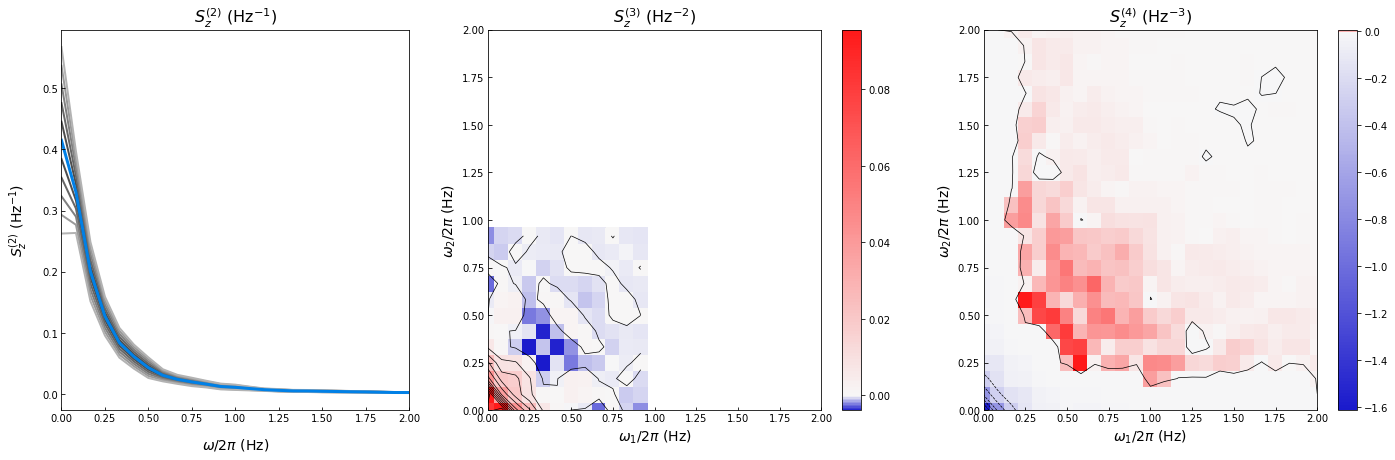

In [5]:
fig = spec.poly_plot(arcsinh_plot=False, sigma=2, f_max=f_max, green_alpha=0.0, arcsinh_const=1e-4, contours=True)


In the powerspectrum the confidence intervals are shown as bands from $1\sigma$ to $5\sigma$. For the contour plots we 
can choose a multiple of $\sigma$ and color data points green that do not lay within the confidence intervall:

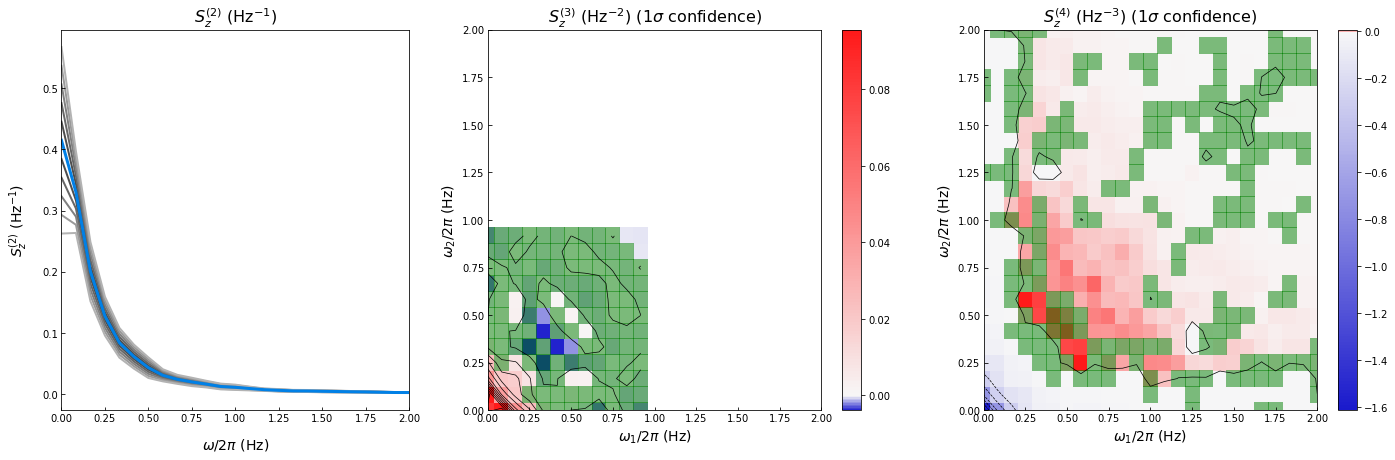

In [5]:
fig = spec.poly_plot(arcsinh_plot=False, sigma=1, f_max=f_max, green_alpha=0.5, arcsinh_const=1e-4, contours=True)



The measurement time should be increased. 

